# Boston Housing Price Prediction using Linear Regression

The objective is to predict the value of prices of the house using the given features.

2 types of Implementation
1) Simple Linear Regression with 2 variables

2) Multiple Linear Regression with many  variables

# 1- Simple Linear Regression

In [1]:
import pandas as pd 
#import matplotlib.pyplot as plot
import numpy as np
import seaborn as sns 

%matplotlib inline

#data

In [2]:
data = pd.read_csv('Boston1.csv')

Housing dataset which contains information about different houses in Boston

In [3]:
data.shape

(506, 14)

In [4]:
data.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

PTRATIO: Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population


MEDV: Median value of owner-occupied homes in $1000s


NOTE: MEDV is the value we want to Predict, the targetted value.
The prices of the house indicated by the variable MEDV is our 
target variable and the remaining are 
the feature variables based on which we will predict the value of a house.

In [5]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# SIMPLE LINEAR REGRESSION

1) Simple linear Regression:
In this first example we are going to use only 2 variables.
Let us take out the dependent and indpendent vaiables from the dataset

Independtent :lstat

Dependent:medv

In [6]:
data_ = data.loc[:,['lstat','medv']]
data_.head(5)

,lstat,medv
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


# Visualizing variables

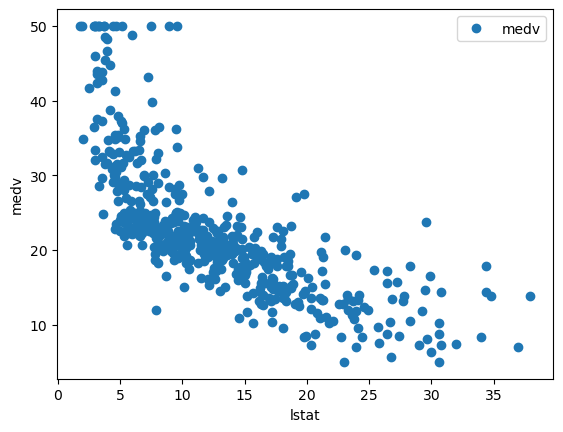

In [7]:
import matplotlib.pyplot as plt

data.plot(x='lstat',y='medv',style='o')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.show()

# Preparing data

In [8]:
X = pd.DataFrame(data['lstat'])
y = pd.DataFrame(data['medv'])

In [9]:
X

,lstat
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33
...,...
501,9.67
502,9.08
503,5.64
504,6.48


In [10]:
y

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [11]:
X.size, y.size

(506, 506)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


# Training 

In [14]:
from sklearn.linear_model import LinearRegression
#object creation
regressor = LinearRegression() 

#passing the variables

regressor.fit(X_train, y_train)
#regressor.fit(y_train, X_train)

#training-fit-Training model , building the equation

LinearRegression()

In [15]:
print(regressor.coef_)
print(regressor.fit_intercept)

[[-0.92441715]]
True


NOW we test our model if is giving correct predicitons?

Here below we are using X_test data = lstat data as input (independent data) 
to predict the housing prices which is medv

In [16]:
y_pred = regressor.predict(X_test)
#y_pred
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])

In [17]:
print(y_pred)
#y_pred.head(5)

     Predicted
0    27.374117
1    27.697663
2    16.955936
3    26.847199
4    24.915168
..         ...
97   26.791734
98   30.507891
99   22.317555
100  19.830873
101  16.909715

[102 rows x 1 columns]


the actual values of predictions are given below:medv

In [18]:
y_test.head(5)

,medv
307,28.2
343,23.9
47,16.6
67,22.0
362,20.8


# R Square- Coefficient of Determination, Goodness of Fit - metrics

Test data

In [19]:
# from sklearn import metrics  
from sklearn.metrics import r2_score
ac_sl=r2_score(y_test, y_pred, sample_weight=None)
ac_sl

0.5244757432765152

In [20]:
y_pred = regressor.predict(X_test)
#y_pred
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])

# What is the Accuracy for our Training Data

In [21]:
y_TrainPred = regressor.predict(X_train)
#y_pred
y_TrainPred = pd.DataFrame(y_TrainPred, columns=['TrainPredicted'])

In [22]:
y_TrainPred

,TrainPredicted
0,28.964115
1,27.993477
2,5.853686
3,22.927671
4,18.471980
...,...
399,25.784120
400,29.232196
401,16.429018
402,24.277320


In [23]:
#this is accuracy for traning data so we ignore
r2_score(y_train, y_TrainPred, sample_weight=None)

0.5495280791456811

# Mulitple Linear Regression

In [24]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('Boston1.csv')
#dataset


In [25]:
dataset.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


2) Multiple Linear Regression with many  variables

In [26]:
X = pd.DataFrame(dataset.iloc[:,:-1])
y = pd.DataFrame(dataset.iloc[:,-1])

In [27]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [28]:
y

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


In [31]:
X_test.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
226,0.38214,0.0,6.20,0,0.504,8.040,86.5,3.2157,8,307,17.4,387.38,3.13
292,0.03615,80.0,4.95,0,0.411,6.630,23.4,5.1167,4,245,19.2,396.90,4.70
90,0.04684,0.0,3.41,0,0.489,6.417,66.1,3.0923,2,270,17.8,392.18,8.81
373,11.10810,0.0,18.10,0,0.668,4.906,100.0,1.1742,24,666,20.2,396.90,34.77
273,0.22188,20.0,6.96,1,0.464,7.691,51.8,4.3665,3,223,18.6,390.77,6.58


In [32]:
X.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [33]:
# Creating a LinearRegression object and fitting it
# on our trainging set.
regressor = LinearRegression()
#fit means CREATE AND EQUATION , CREATE MODEL, TRAIN THE MODEL

#linear
#X_train, X_test, y_train, y_test
regressor.fit(X_train,  y_train)
#y = .1x + 3.3


LinearRegression()

In [34]:
print(regressor.coef_)
print(regressor.intercept_)

[[-1.30799852e-01  4.94030235e-02  1.09535045e-03  2.70536624e+00
  -1.59570504e+01  3.41397332e+00  1.11887670e-03 -1.49308124e+00
   3.64422378e-01 -1.31718155e-02 -9.52369666e-01  1.17492092e-02
  -5.94076089e-01]]
[37.91248701]


In [35]:
X_test.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
226,0.38214,0.0,6.20,0,0.504,8.040,86.5,3.2157,8,307,17.4,387.38,3.13
292,0.03615,80.0,4.95,0,0.411,6.630,23.4,5.1167,4,245,19.2,396.90,4.70
90,0.04684,0.0,3.41,0,0.489,6.417,66.1,3.0923,2,270,17.8,392.18,8.81
373,11.10810,0.0,18.10,0,0.668,4.906,100.0,1.1742,24,666,20.2,396.90,34.77
273,0.22188,20.0,6.96,1,0.464,7.691,51.8,4.3665,3,223,18.6,390.77,6.58


In [36]:
y_pred = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])
y_pred.head(5)

,Predicted
0,37.563118
1,32.144451
2,27.065736
3,5.670806
4,35.099826


In [37]:
y_test.head(5)

,medv
226,37.6
292,27.9
90,22.6
373,13.8
273,35.2


In [38]:
from sklearn import metrics  
from sklearn.metrics import r2_score
ac_ml=r2_score(y_test, y_pred, sample_weight=None)

ac_ml

0.7334492147453088

In [39]:
print(X_test)

         crim    zn  indus  chas    nox     rm    age     dis  rad  tax  \
226   0.38214   0.0   6.20     0  0.504  8.040   86.5  3.2157    8  307   
292   0.03615  80.0   4.95     0  0.411  6.630   23.4  5.1167    4  245   
90    0.04684   0.0   3.41     0  0.489  6.417   66.1  3.0923    2  270   
373  11.10810   0.0  18.10     0  0.668  4.906  100.0  1.1742   24  666   
273   0.22188  20.0   6.96     1  0.464  7.691   51.8  4.3665    3  223   
..        ...   ...    ...   ...    ...    ...    ...     ...  ...  ...   
349   0.02899  40.0   1.25     0  0.429  6.939   34.5  8.7921    1  335   
212   0.21719   0.0  10.59     1  0.489  5.807   53.8  3.6526    4  277   
156   2.44668   0.0  19.58     0  0.871  5.272   94.0  1.7364    5  403   
480   5.82401   0.0  18.10     0  0.532  6.242   64.7  3.4242   24  666   
248   0.16439  22.0   5.86     0  0.431  6.433   49.1  7.8265    7  330   

     ptratio   black  lstat  
226     17.4  387.38   3.13  
292     19.2  396.90   4.70  
90      1

In [40]:
df1 = pd.DataFrame(y_test) 
df2 = pd.DataFrame(y_pred) 

In [41]:
type(df1.medv)

pandas.core.series.Series

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  

In [43]:
df1.merge(df2, left_on='medv', right_index=True).reset_index()

C:\Users\arun_\AppData\Local\Temp\ipykernel_2968\3977329153.py:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df1.merge(df2, left_on='medv', right_index=True).reset_index()


,index,medv,Predicted
0,234,29.0,20.529726
1,339,19.0,14.134086
2,410,15.0,14.394569
3,132,23.0,24.197601
4,480,23.0,24.197601
5,489,7.0,31.810192
6,414,7.0,31.810192
7,140,14.0,28.516336
8,263,31.0,6.925536
9,163,50.0,20.494995


# Exploratory Data Analysis for improve the Model Accuracy

In [44]:
#import seaborn as sns 

#%matplotlib inline

In [45]:
# compute the pair wise correlation for all columns  
#correlation_matrix = boston.corr().round(2)
correlation_matrix = data.corr().round(2)


In [46]:
correlation_matrix = data.corr().round(2)


In [47]:
correlation_matrix

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
zn,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
indus,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
chas,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
nox,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
rm,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
age,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
dis,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
rad,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
tax,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


<Axes: >

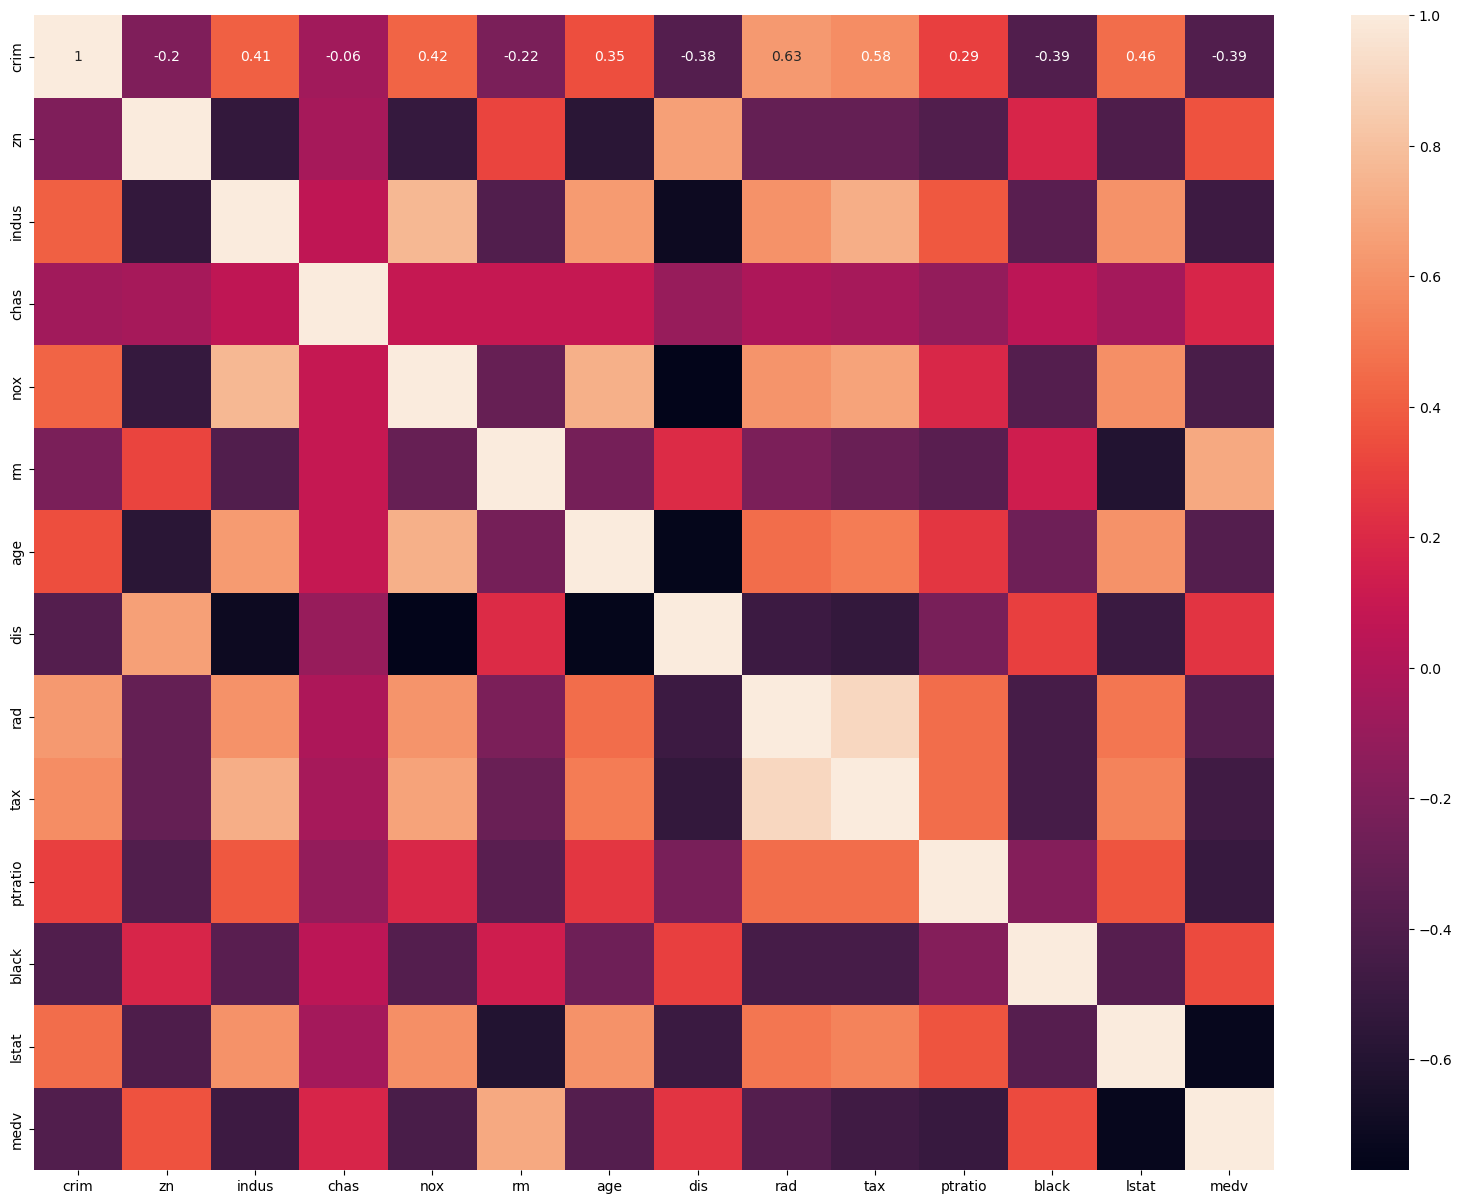

In [48]:
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
plt.subplots(figsize=(20,15))
#plot.subplots(figsize=(20,15))
sns.heatmap(data=correlation_matrix, annot=True)


In [49]:
#multicolinearity between rad and tax, so drop rad

bdata = pd.DataFrame(data)

#bdata = bdata.drop(columns=['rad'])
bdata = bdata.drop(columns=['tax'])
bfeatures=bdata.drop(columns=['medv'])
X = pd.DataFrame(bfeatures)
y = pd.DataFrame(bdata['medv'])

In [50]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,21.0,393.45,6.48


In [51]:
bdata.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33,36.2


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [53]:
# Creating a LinearRegression object and fitting it
# on our trainging set.
regressor = LinearRegression()
#fit means CREATE AND EQUATION , CREATE MODEL, TRAIN THE MODEL

#linear
#X_train, X_test, y_train, y_test
regressor.fit(X_train,  y_train)
#y = .1x + 3.3


LinearRegression()

In [54]:
y_pred = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])
y_pred.head(5)

,Predicted
0,37.288233
1,31.009391
2,27.570802
3,5.674289
4,34.767298


In [55]:
from sklearn import metrics  
from sklearn.metrics import r2_score
ac_ml_no_rad=r2_score(y_test, y_pred, sample_weight=None)
ac_ml_no_rad

0.7295943162497632

# 1. visualization method for detecting outliers

C:\Users\arun_\AppData\Local\Temp\ipykernel_2968\1957050763.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['medv'], bins=30)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


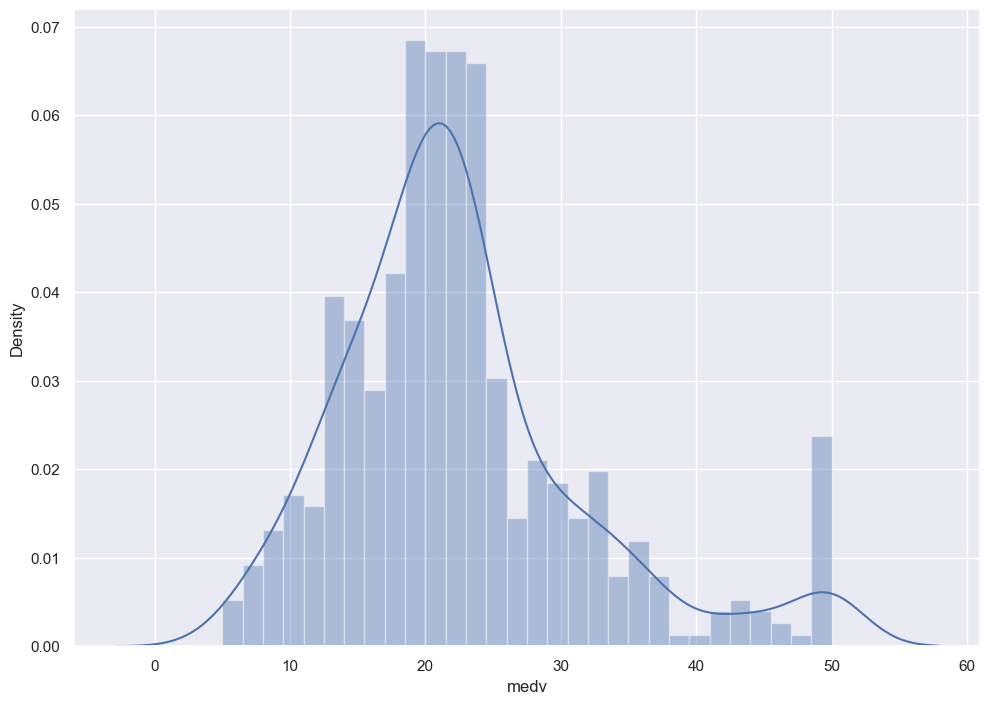

In [56]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.distplot(data['medv'], bins=30)
plt.show()

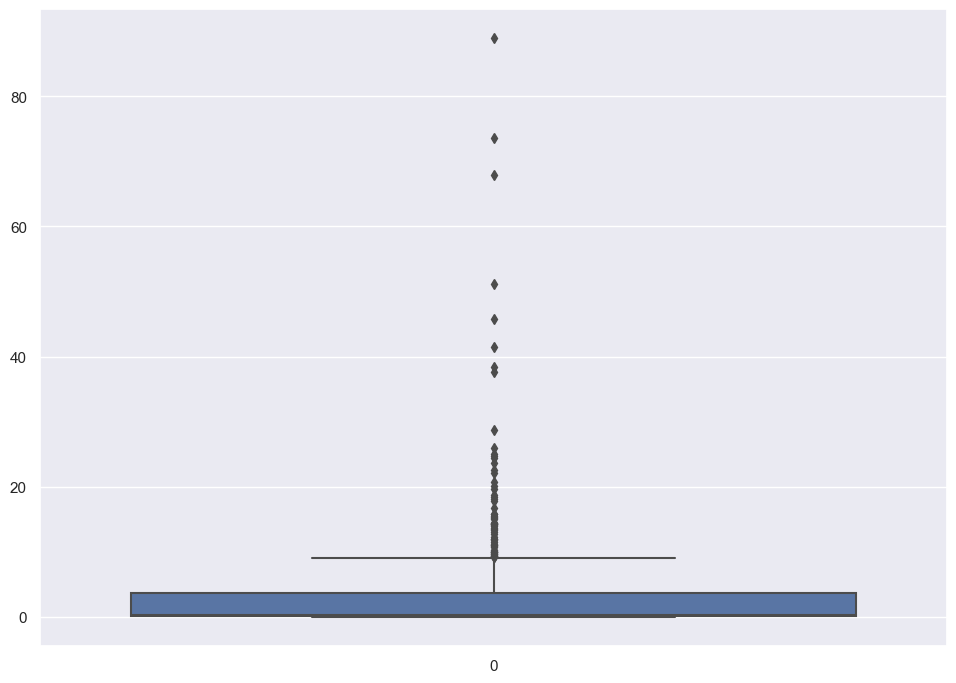

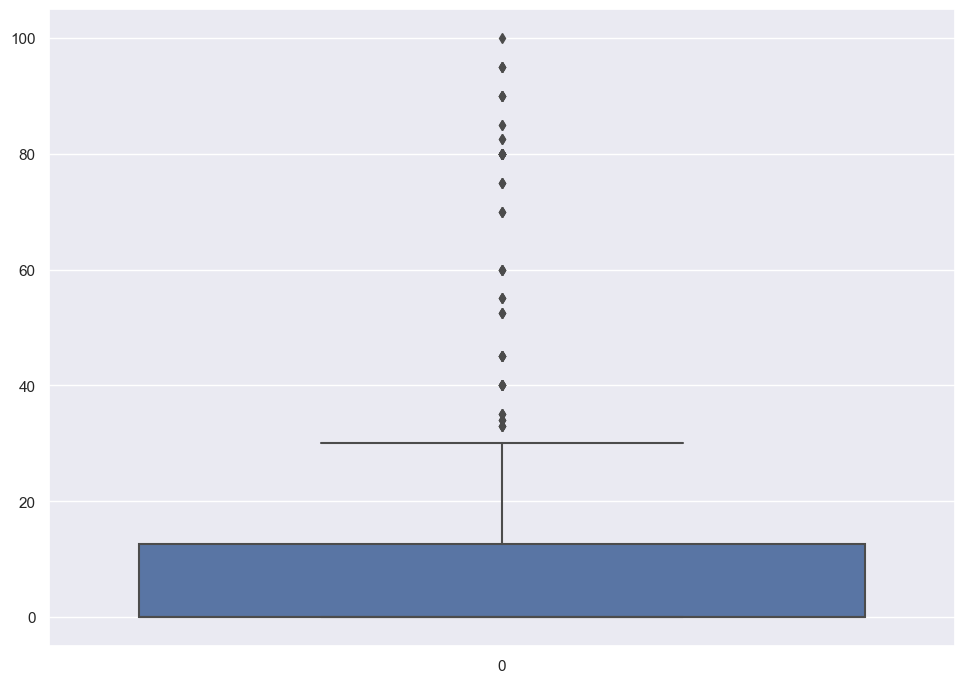

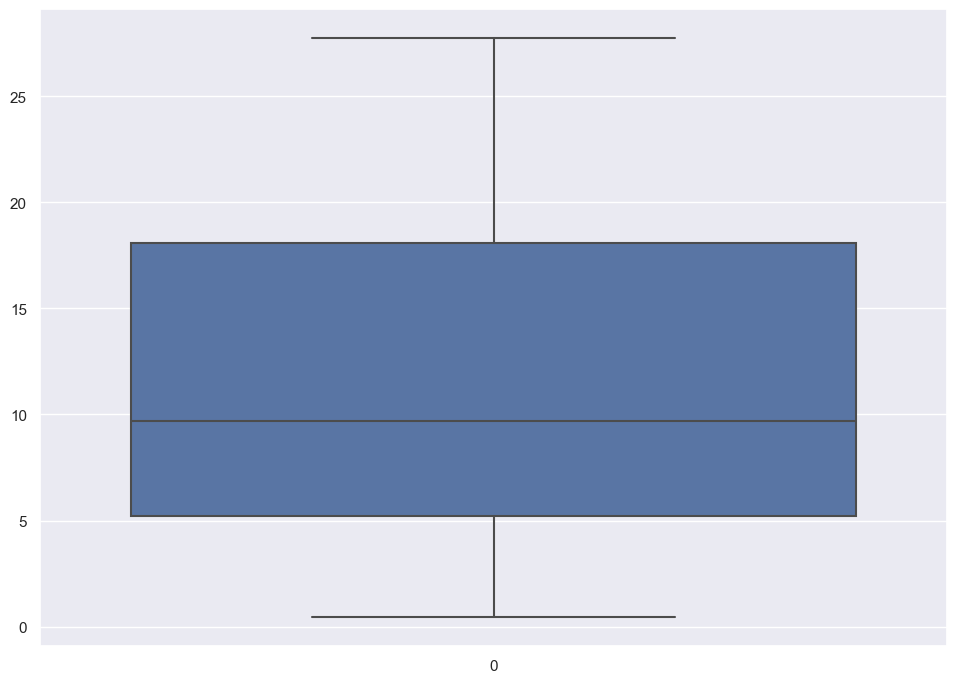

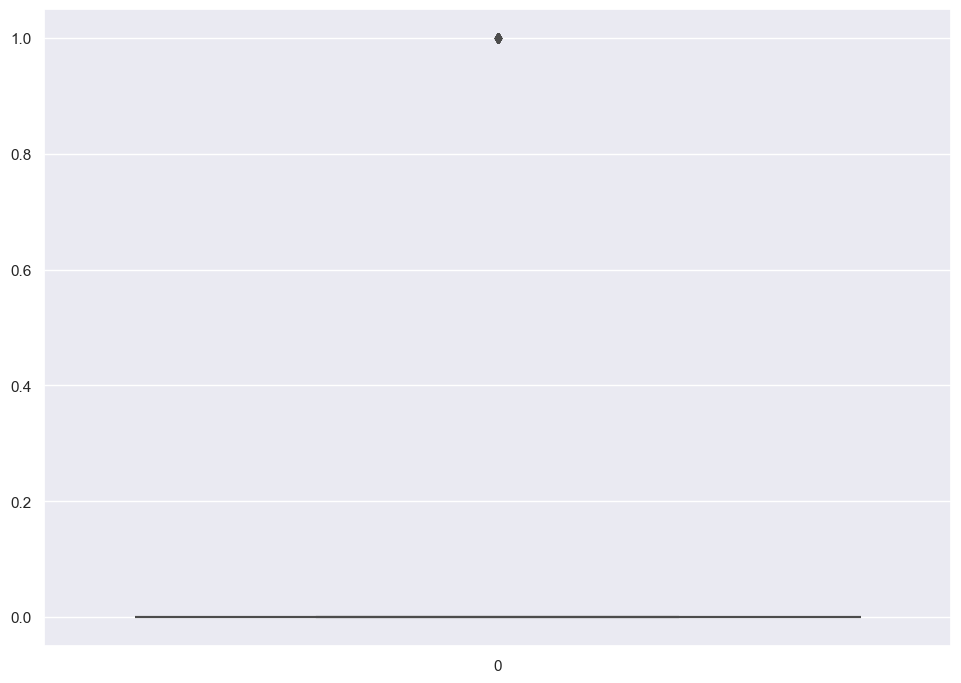

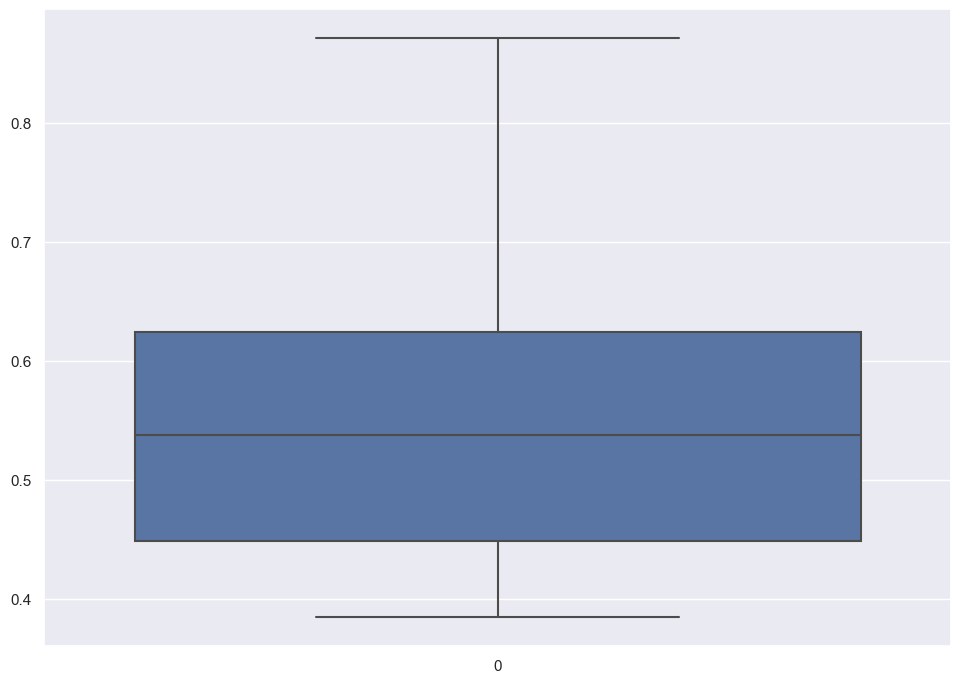

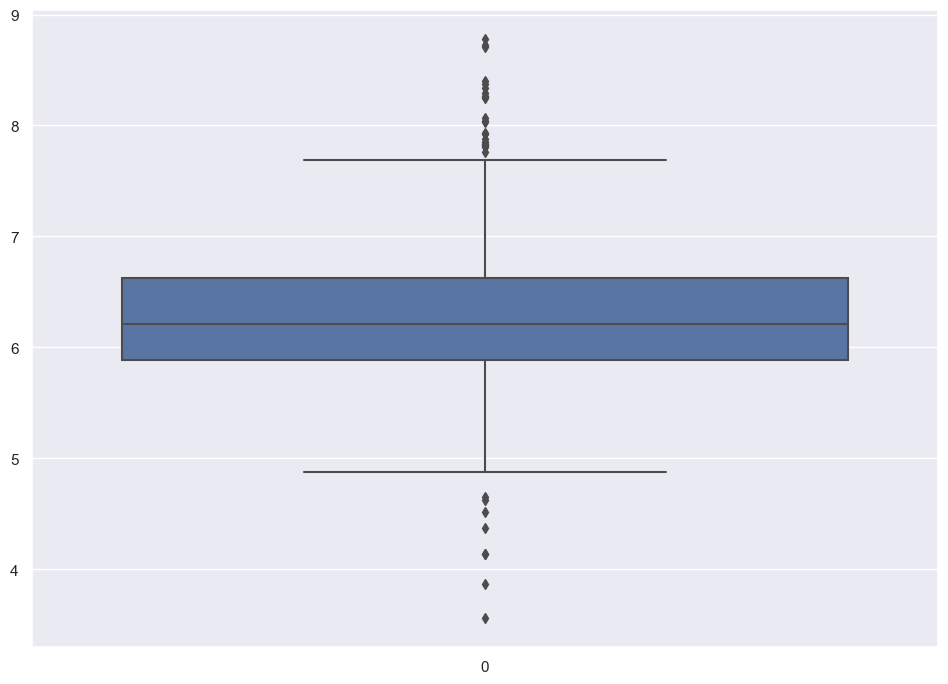

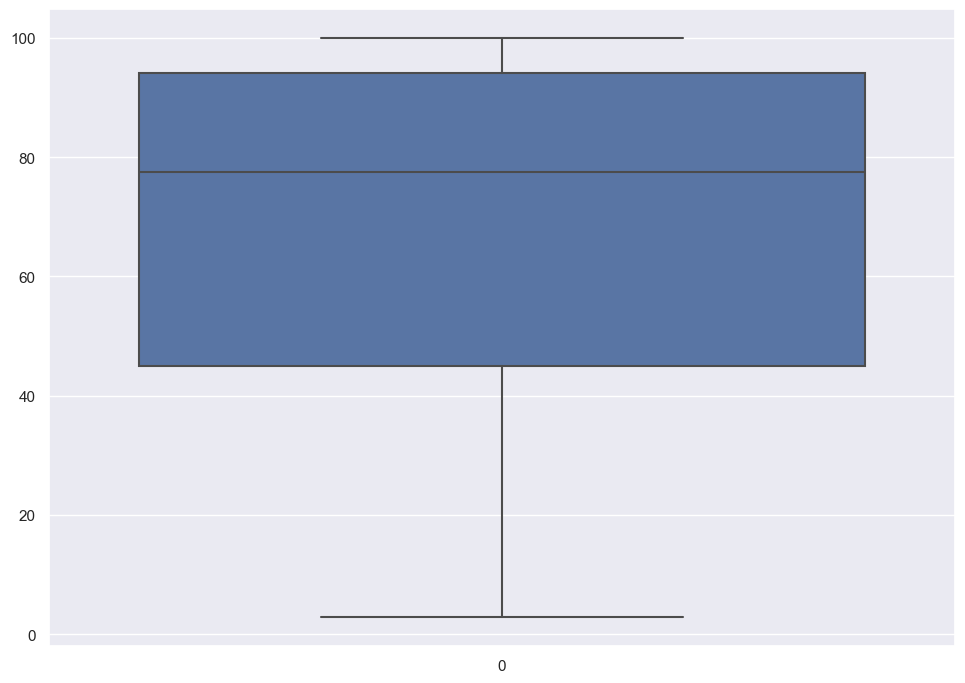

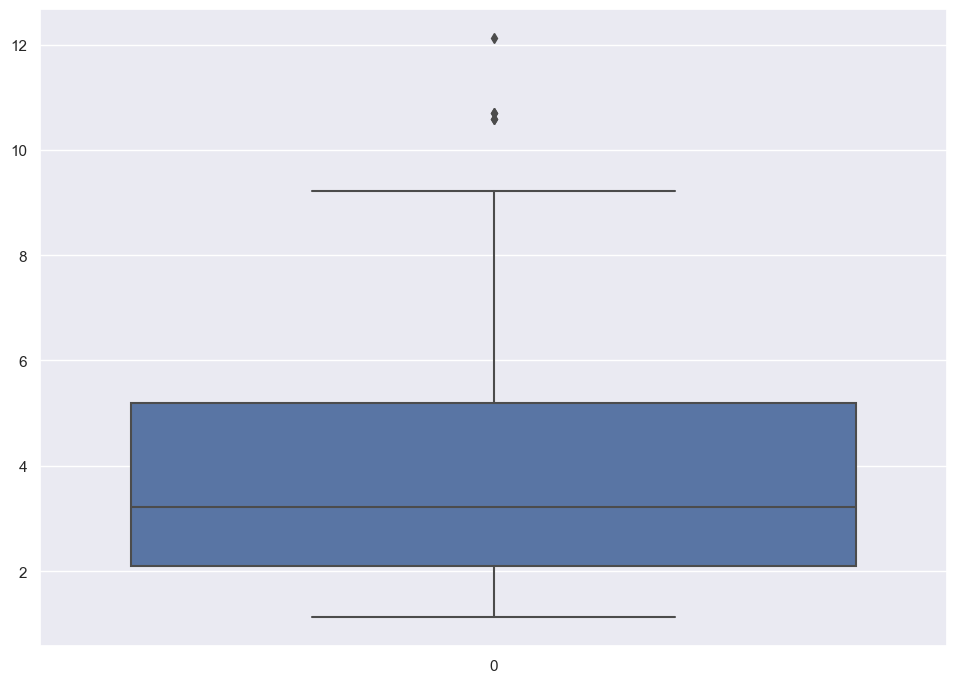

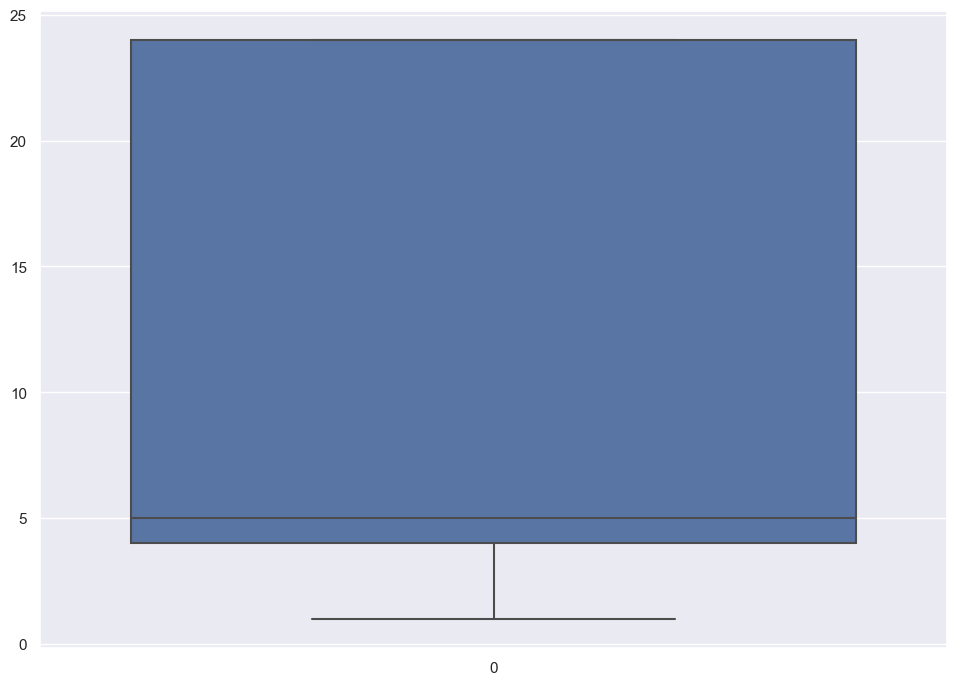

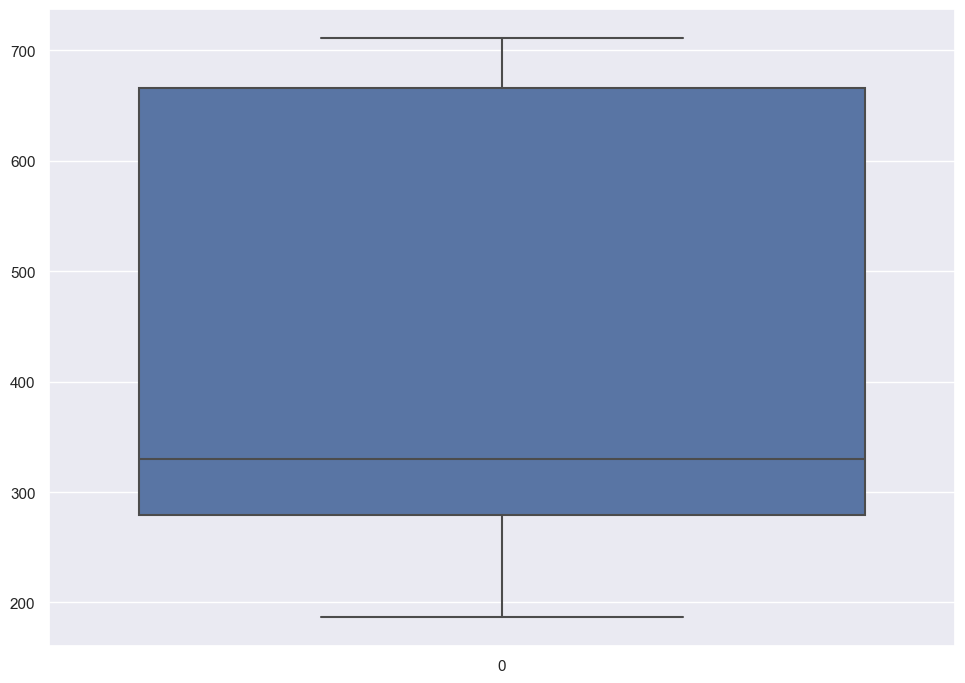

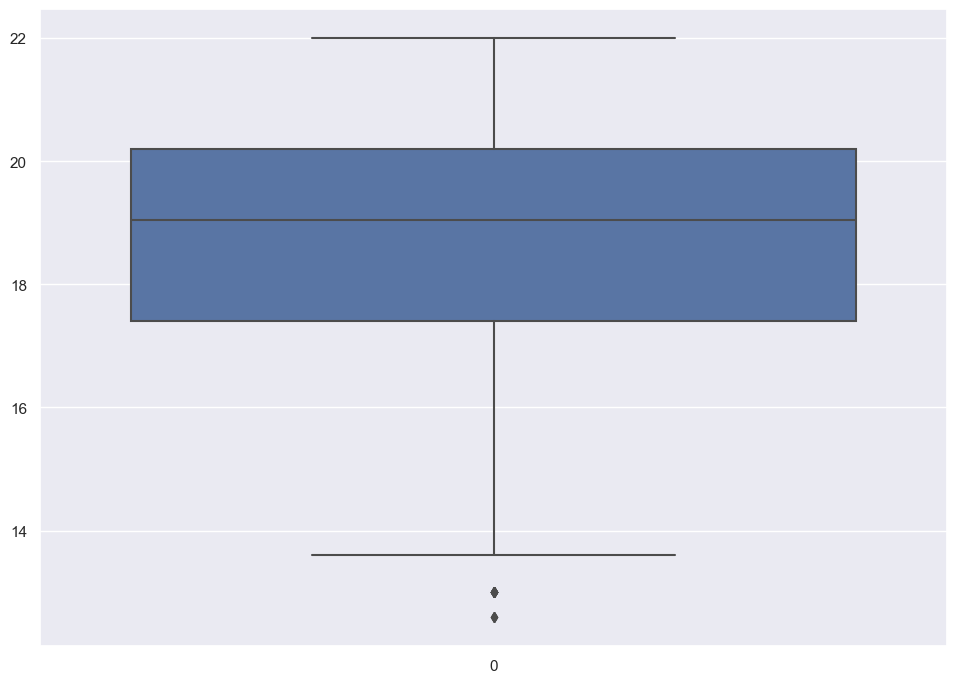

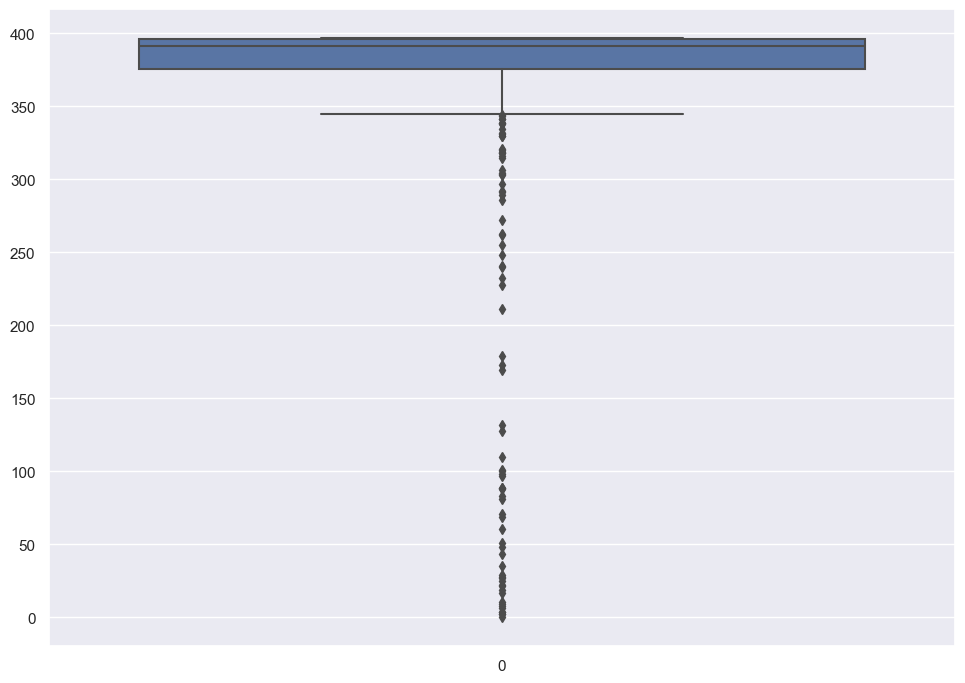

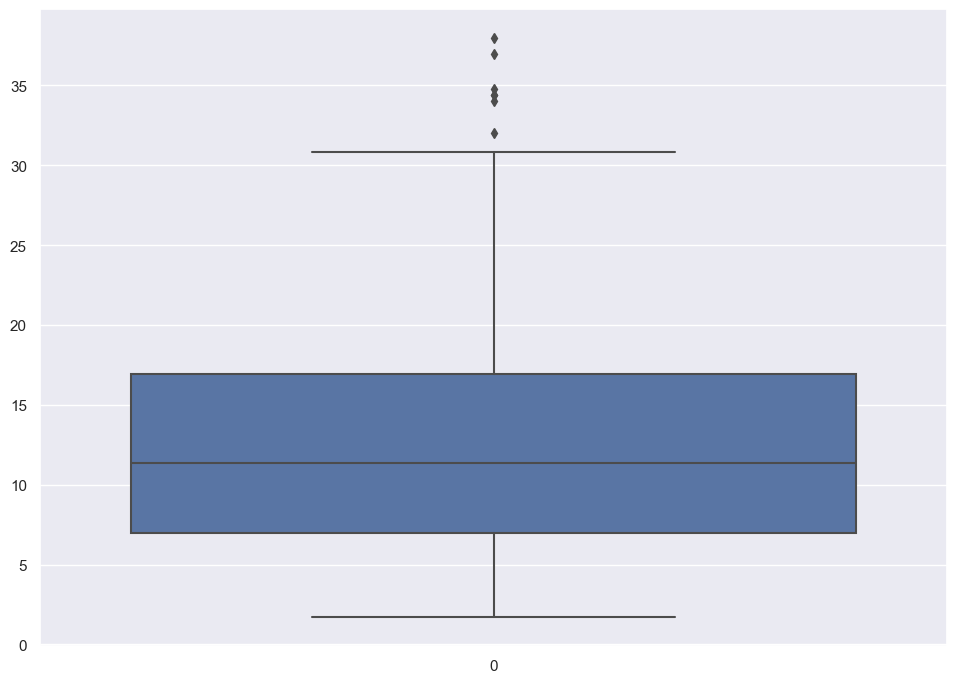

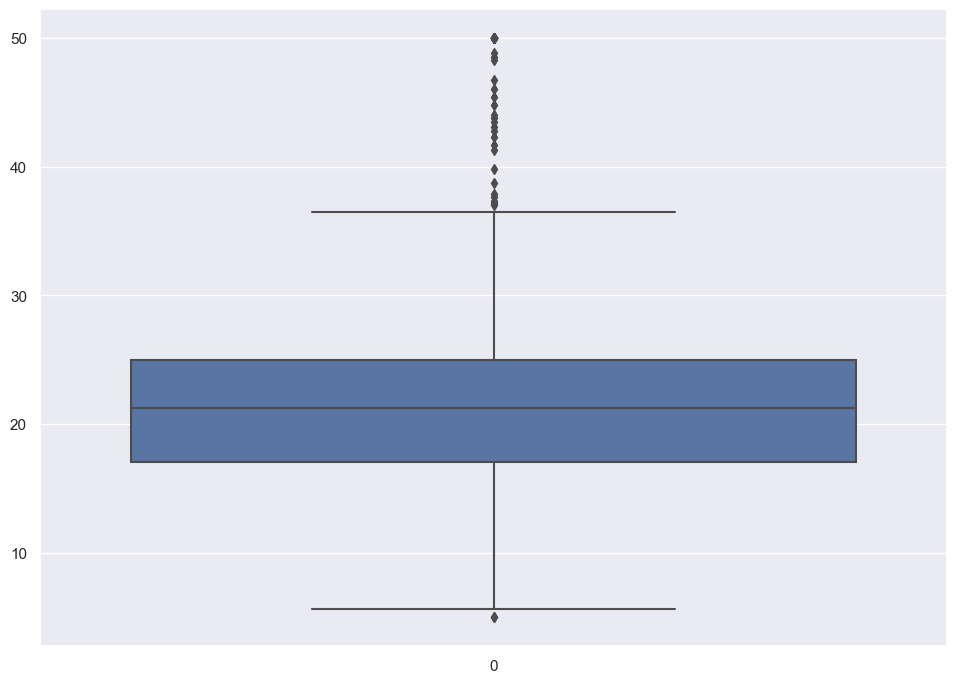

In [57]:
for i in dataset.columns:
    sns.boxplot(dataset[i])
    plt.show()

In [58]:
# pairplot
sns.pairplot(data)
plt.savefig("pairplot.png")
plt.clf()
plt.close()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

# Scatter plot

In [59]:
sns.scatterplot(dataset['rad'], dataset['medv'])
#sns.scatterplot(dataset['indus'], dataset['tax'])
plt.show()

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

# 2. Statistical method to remove outliers

### using z-score to remove ouliter

In [60]:
from scipy import stats

In [61]:
# calculate z score
z = np.abs(stats.zscore(dataset))

print(z)

         crim        zn     indus      chas       nox        rm       age  \
0    0.419782  0.284830  1.287909  0.272599  0.144217  0.413672  0.120013   
1    0.417339  0.487722  0.593381  0.272599  0.740262  0.194274  0.367166   
2    0.417342  0.487722  0.593381  0.272599  0.740262  1.282714  0.265812   
3    0.416750  0.487722  1.306878  0.272599  0.835284  1.016303  0.809889   
4    0.412482  0.487722  1.306878  0.272599  0.835284  1.228577  0.511180   
..        ...       ...       ...       ...       ...       ...       ...   
501  0.413229  0.487722  0.115738  0.272599  0.158124  0.439316  0.018673   
502  0.415249  0.487722  0.115738  0.272599  0.158124  0.234548  0.288933   
503  0.413447  0.487722  0.115738  0.272599  0.158124  0.984960  0.797449   
504  0.407764  0.487722  0.115738  0.272599  0.158124  0.725672  0.736996   
505  0.415000  0.487722  0.115738  0.272599  0.158124  0.362767  0.434732   

          dis       rad       tax   ptratio     black     lstat      medv  

In [62]:
# any data point with z-score greater then 3 is an outlier
threshold = 3
print(np.where(z>3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

In [63]:
# 55 is the row no and 1 is the column no
print(z[55][1])

KeyError: 55

In [64]:
## Remove outliers (z-score), keep only data with std deviation(z) of <3

In [65]:
new_df = dataset[(z <=3.3).all(axis=1)]
#new_df = dataset[(z < 3).all(axis=1)]

In [66]:
# check the shape of new and old df
dataset.shape, new_df.shape

((506, 14), (431, 14))

In [67]:
X = pd.DataFrame(new_df.iloc[:,:-1])
y = pd.DataFrame(new_df.iloc[:,-1])

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [69]:
# Creating a LinearRegression object and fitting it
# on our trainging set.
regressor3 = LinearRegression()
#fit means CREATE AND EQUATION , CREATE MODEL, TRAIN THE MODEL

#linear
#X_train, X_test, y_train, y_test
regressor3.fit(X_train,  y_train)
#y = .1x + 3.3


LinearRegression()

In [70]:
y_pred = regressor3.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])
y_pred.head(5)

,Predicted
0,19.441466
1,21.519113
2,13.654576
3,20.964062
4,36.607263


In [71]:
from sklearn import metrics  
from sklearn.metrics import r2_score
ac_ml_no_out=r2_score(y_test, y_pred, sample_weight=None)
ac_ml_no_out

0.7357349503602002

# IQR Score

In [72]:
q1 = dataset.quantile(0.25)
q3 = dataset.quantile(0.75)

# calculate IQR
IQR = q3 - q1

print(IQR)

crim         3.595038
zn          12.500000
indus       12.910000
chas         0.000000
nox          0.175000
rm           0.738000
age         49.050000
dis          3.088250
rad         20.000000
tax        387.000000
ptratio      2.800000
black       20.847500
lstat       10.005000
medv         7.975000
dtype: float64


In [73]:
# find the outliers
iqr_outlier = (dataset <  (q1 - 1.5 * IQR)) | (dataset > (q3 + 1.5 * IQR))

print(iqr_outlier)

      crim     zn  indus   chas    nox     rm    age    dis    rad    tax  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     ptratio  black  lstat   medv  
0      False  False  False  False  
1  

# Remove outliers (IQR score)

In [74]:
new_df_iq = dataset[~((dataset < (q1 - 1.5 * IQR)) | (dataset > (q3 + 1.5 * IQR))).any(axis=1)]

In [75]:
new_df_iq.shape

(268, 14)

In [76]:
X = pd.DataFrame(new_df_iq.iloc[:,:-1])
y = pd.DataFrame(new_df_iq.iloc[:,-1])

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [78]:
# Creating a LinearRegression object and fitting it
# on our trainging set.
regressor4 = LinearRegression()
#fit means CREATE AND EQUATION , CREATE MODEL, TRAIN THE MODEL

#linear
#X_train, X_test, y_train, y_test
regressor4.fit(X_train,  y_train)
#y = .1x + 3.3


LinearRegression()

In [79]:
y_pred = regressor4.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])
y_pred.head(5)

,Predicted
0,20.819778
1,25.663841
2,15.258809
3,21.168544
4,22.373896


In [80]:
from sklearn import metrics  
from sklearn.metrics import r2_score
ac_ml_no_iqr=r2_score(y_test, y_pred, sample_weight=None)
ac_ml_no_iqr

0.6068371235053762

In [81]:
acc_data= {'simple linear regression' :  [ac_sl],
       'multilinear regression': [ac_ml],
       'drop rad' : [ac_ml_no_rad],
       'remove_outliers' : [ac_ml_no_out],
        'remove_iqr' : [ac_ml_no_iqr]  
          }


In [82]:
models=['Accuracy']

In [83]:
Result=pd.DataFrame(acc_data, index= models)
Result

,simple linear regression,multilinear regression,drop rad,remove_outliers,remove_iqr
Accuracy,0.524476,0.733449,0.729594,0.735735,0.606837


# Using 3 Columns

In [84]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [85]:
data4 = data.loc[:,['rm','ptratio','lstat','tax','medv']]
data4.head(5)

,rm,ptratio,lstat,tax,medv
0,6.575,15.3,4.98,296,24.0
1,6.421,17.8,9.14,242,21.6
2,7.185,17.8,4.03,242,34.7
3,6.998,18.7,2.94,222,33.4
4,7.147,18.7,5.33,222,36.2


In [86]:
X = pd.DataFrame(data4.iloc[:,:-1])
y = pd.DataFrame(data4.iloc[:,-1])

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [88]:
# Creating a LinearRegression object and fitting it
# on our trainging set.
regressor5 = LinearRegression()
#fit means CREATE AND EQUATION , CREATE MODEL, TRAIN THE MODEL

#linear
#X_train, X_test, y_train, y_test
regressor5.fit(X_train,  y_train)
#y = .1x + 3.3


LinearRegression()

In [89]:
y_pred = regressor5.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])
y_pred.head(5)

,Predicted
0,36.546163
1,28.327684
2,26.161494
3,1.115746
4,31.875326


In [90]:
from sklearn import metrics  
from sklearn.metrics import r2_score
ac_ml_data4=r2_score(y_test, y_pred, sample_weight=None)
ac_ml_data4

0.6936559148531665

# SC (standard Scaler)

In [91]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [92]:
#data4d = data.loc[:,['rm','ptratio','lstat','tax','medv']]
data4d=data
data4d.head(5)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [93]:
X = pd.DataFrame(data4d.iloc[:,:-1])
y = pd.DataFrame(data4d.iloc[:,-1])

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [108]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


X_train= sc.fit_transform(X_train)
#y_train= sc.fit_transform(y_train)

X_test= sc.transform(X_test)
#y_test= sc.fit_transform(y_test)

In [110]:
print(X_train)

[[-2.76469903e-01 -5.07766334e-01 -4.02011945e-01 ...  1.17561917e+00
  -3.01968083e-04  8.35287872e-01]
 [-4.07463681e-01  3.33136528e+00 -1.43188822e+00 ... -2.20285923e+00
   4.12907260e-01 -1.32549534e+00]
 [ 8.06483214e+00 -5.07766334e-01  1.07815655e+00 ...  8.10378266e-01
  -3.84927565e+00  1.15819623e+00]
 ...
 [-3.88566725e-01 -5.07766334e-01 -1.71664438e-01 ...  3.53827130e-01
   3.87833612e-01  7.28600090e-01]
 [-3.82724087e-01 -5.07766334e-01 -3.79142727e-02 ...  7.98964487e-02
   4.05598798e-01 -2.14519905e-01]
 [-3.96910057e-01  2.90479510e+00 -1.32786031e+00 ...  1.63217031e+00
   1.93878260e-01 -9.82671938e-01]]


In [96]:
# Creating a LinearRegression object and fitting it
# on our trainging set.
regressor6 = LinearRegression()
#fit means CREATE AND EQUATION , CREATE MODEL, TRAIN THE MODEL

#linear
#X_train, X_test, y_train, y_test
#regressor6.fit(X_train_sc,  y_train)
regressor6.fit(X_train,  y_train)
#y = .1x + 3.3


LinearRegression()

In [97]:
y_pred = regressor6.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])
y_pred.head(5)

,Predicted
0,37.563118
1,32.144451
2,27.065736
3,5.670806
4,35.099826


In [98]:
from sklearn import metrics  
from sklearn.metrics import r2_score
ac_ml_sc=r2_score(y_test, y_pred, sample_weight=None)
ac_ml_sc

0.7334492147453074

# Decsion Tree- Random Forest Regressor

it will output or predict continous numbers.
it is difference from the Decsion Tree Classifier that outputs or predicts categorical values

In [99]:
X = pd.DataFrame(data.iloc[:,:-1])
y = pd.DataFrame(data.iloc[:,-1])

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [101]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
regRFG = RandomForestRegressor()

# Train the model using the training sets 
regRFG.fit(X_train, y_train)

C:\Users\arun_\AppData\Local\Temp\ipykernel_2968\2323836254.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regRFG.fit(X_train, y_train)


RandomForestRegressor()

In [102]:
y_pred = regRFG.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted'])
y_pred.head(5)

,Predicted
0,47.428
1,28.027
2,22.351
3,11.317
4,41.908


In [103]:
from sklearn import metrics  
from sklearn.metrics import r2_score
ac_ml_regRFG=r2_score(y_test, y_pred, sample_weight=None)
ac_ml_regRFG

0.8733589176445997

# Checking Multi Collinearity using VIF

In [104]:
# VIF

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [106]:
X = data.iloc[:,:-1]

calc_vif(X)

,variables,VIF
0,crim,2.100373
1,zn,2.844013
2,indus,14.485758
3,chas,1.152952
4,nox,73.894947
5,rm,77.948283
6,age,21.386850
7,dis,14.699652
8,rad,15.167725
9,tax,61.227274
